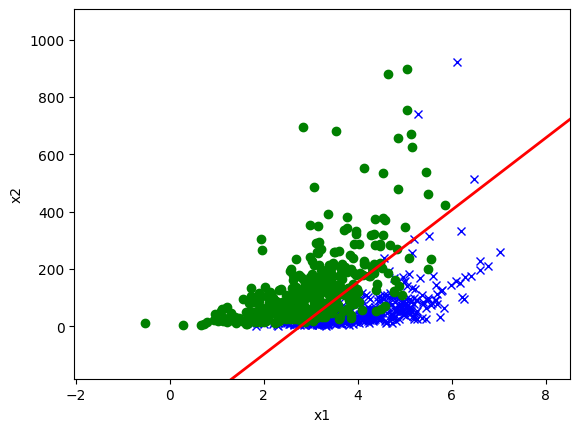

In [10]:
import numpy as np
import util

from linear_model import LinearModel

train_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds1_train.csv"
eval_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds1_valid.csv"
pred_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds1_pred.csv"

def main(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    clf = GDA()
    print()
    clf.fit(x_train,y_train)
    # *** START CODE HERE ***
    # *** END CODE HERE ***


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m,n = x.shape
        count_o = np.dot(np.ones(m),y)
        count_z = np.dot(np.ones(m),np.ones(m)-y)
        phi = count_o/m
        mu_1 = np.matmul(np.transpose(x),y)/count_o
        mu_0 = np.matmul(np.transpose(x),np.ones(m)-y)/count_z
        cov_m = np.zeros((n,n))
        for i in range(0,m):
            if(y[i] == 0):
                cov_m = cov_m+np.matmul((x[i]-mu_0).reshape((-1, 1)),(x[i]-mu_1).reshape((1, -1)))
            if(y[i] == 1):
                cov_m = cov_m+np.matmul((x[i]-mu_1).reshape((-1, 1)),(x[i]-mu_1).reshape((1, -1)))
        cov_m = cov_m/m
        theta = -np.matmul(np.linalg.inv(cov_m),mu_0)+np.matmul(np.linalg.inv(cov_m),mu_1)
        cov_m_inv = np.linalg.inv(cov_m)
        theta_zero = 1/2*mu_0 @ cov_m_inv @ mu_0 -1/2*mu_1 @ cov_m_inv @ mu_1 - np.log((1-phi)/phi)
        theta = np.insert(theta,0,theta_zero)
        util.plot(x,y,theta)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        # *** END CODE HERE
main(train_path, eval_path,pred_path)

(100,)


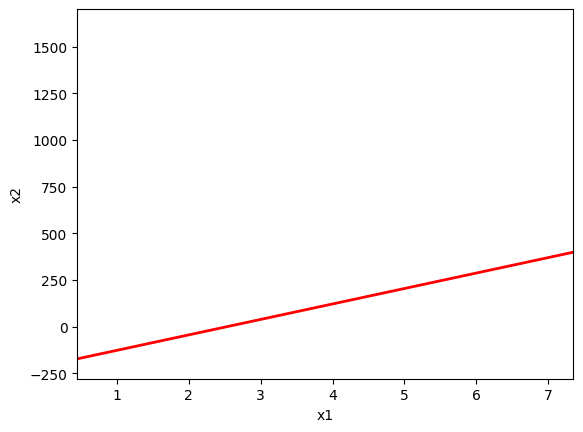

In [9]:
import numpy as np
import util
import math
from linear_model import LinearModel

train_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds1_train.csv"
eval_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds1_valid.csv"
pred_path = "/home/aryan/Desktop/CS229-Solutions/ps1/data/ds1_pred.csv"
def main(train_path, eval_path, pred_path):
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    clf = LogisticRegression()
    theta = clf.fit(x_train, y_train)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = clf.predict(x_eval, theta)
    print(y_eval-y_pred)
    util.plot(x_eval,y_pred,theta)


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.
    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        m,n = x.shape
        theta = np.zeros(n)
        theta_prev = np.ones(n)
        while(np.linalg.norm((theta-theta_prev),2)>=0.00001):
            theta_prev = theta
            H,Div_Theta = Cal_back(x,y,theta)
            theta = theta - np.transpose(np.matmul(np.linalg.inv(H),np.transpose(Div_Theta)))
        return theta
    def predict(self, x, theta):
        return 1/(1 + np.exp(-np.dot(x, theta)))  


def Cal_back(x,y,theta):
    m,n = x.shape
    H = np.ones((n,n))
    for j in range(0,n):
        for l in range(0,n):
            sum = 0
            for i in range(0,m):
                sum += h_theta(x[i], theta)*(1-h_theta(x[i],theta))*x[i][j]*x[i][l]
            sum = sum/m
            H[j][l] = sum
    Div_Theta = np.ones(n)
    for j in range(0,n):
        sum = 0
        for i in range(0,m):
            sum+=(y[i]-h_theta(x[i], theta))*x[i][j]
        sum = -sum/m
        Div_Theta[j] = sum
    return H, Div_Theta 

def h_theta(x, theta):
        t = np.matmul(theta,np.transpose(x))
        
        h = 1/(1+math.exp(-t))
        return h

main(train_path, eval_path,pred_path)